In [2]:
# Initial imports
import pandas as pd
from pathlib import Path

In [3]:
# Read crypto_data.csv into Pandas
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df_crypto.shape

(1252, 7)

In [5]:
df_crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [6]:
# Discarding all cryptocurrencies that are not being traded.
tradingdf = df_crypto[df_crypto["IsTrading"]== True]
tradingdf.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
tradingdf.shape

(1144, 7)

In [8]:
# Dropping IsTrading column from the dataframe
new_tradingdf = tradingdf.drop(["IsTrading"], axis="columns")
new_tradingdf

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
new_tradingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [10]:
# Find null values
for column in new_tradingdf.columns:
    print(f"Column {column} has {new_tradingdf[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [11]:
# Removing all rows that have at least one null value
new_tradingdf2 = new_tradingdf.dropna()
new_tradingdf2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Filtering for cryptocurrencies that have been mined.
mined_tradingdf = new_tradingdf2[new_tradingdf2["TotalCoinsMined"] > 0]
mined_tradingdf

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [13]:
# Remove the CoinName Column
mined_tradingdf = mined_tradingdf.drop(columns=["CoinName"])
mined_tradingdf

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [14]:
crypto_dummies = pd.get_dummies(data=mined_tradingdf, columns = ["Algorithm", "ProofType"])
crypto_dummies


,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
crypto_dummies.columns

Index(['Unnamed: 0', 'TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_

In [16]:
# Split the dataframe into data and target
y = crypto_dummies["Unnamed: 0"].values
X = crypto_dummies.drop('Unnamed: 0', axis=1)

In [17]:
# Standardize/Scale dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [18]:
# Create a DataFrame with the transformed data
new_cryptodf = pd.DataFrame(scaled_data, columns=crypto_dummies.columns[1:])
new_cryptodf

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.149176,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.132179,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


In [19]:
# Performing dimensionality reduction with PCA
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=3)

# Get three principal components for the data.
crypto_pca = pca.fit_transform(new_cryptodf)

In [20]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_crypto_pca

,principal component 1,principal component 2,principal component 3
0,-0.335353,1.042491,-0.550119
1,-0.318711,1.042699,-0.550522
2,2.303387,1.691454,-0.612363
3,-0.145394,-1.361705,0.156783
4,-0.149040,-1.990991,0.355363
...,...,...,...
527,2.486194,0.752073,0.002849
528,-0.333402,1.042374,-0.550156
529,0.323833,-2.331856,0.345337
530,-0.150874,-2.003214,0.385130


In [21]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02793105, 0.0213972 , 0.02049255])

In [22]:
# Performing dimensionality reduction with PCA
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=4)

# Get three principal components for the data.
crypto_pca = pca.fit_transform(new_cryptodf)

In [23]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4"]
)
df_crypto_pca

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.335576,0.944734,-0.562190,-0.002933
1,-0.318909,0.944860,-0.562652,-0.002973
2,2.309395,1.581563,-0.652177,-0.003572
3,-0.141565,-1.281355,0.204122,-0.011045
4,-0.144927,-2.027010,0.428259,0.023316
...,...,...,...,...
527,2.474383,0.924091,-0.173310,-0.063552
528,-0.333622,0.944610,-0.562220,-0.002936
529,0.323110,-2.279657,0.405852,-0.001594
530,-0.156291,-1.883987,0.404419,0.005106


In [24]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279315 , 0.02137372, 0.02050454, 0.02044431])

###### Analysis

According to the explained variance, the first principal component contains approximately 28% of the variance. The second principal component contains 21% of the variance.The third principal component contains 21% of the variance. The fourth principal component contains 20% of the variance. We have approximately 90% of the information in the original dataset. Therefore we need four principal components to preserve 90% of the explained variance in dimensionality reduction as specified in the project requirements.

In [25]:
# Reducing the dataset dimensions with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_crypto_pca)

In [26]:
# Check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

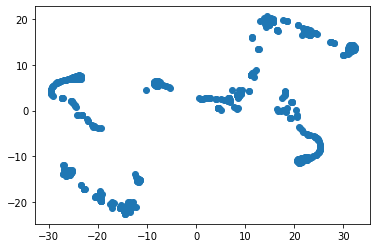

In [27]:
# Plot the results
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

#### Cluster Analysis Using k-means

In [28]:
# Creating an elbow plot to identify the best number of clusters.
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
# Use a for-loop to determine the inertia for each k between 1 through 10
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



C:\Users\Banke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,303442.718750
1,2,94194.687500
2,3,64683.144531
3,4,37371.632812
4,5,22130.853516


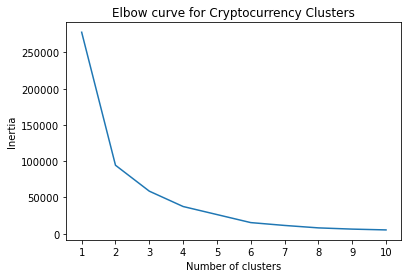

In [60]:
# Plot the elbow curve to find the best value(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Cryptocurrency Clusters')
plt.show()

In [32]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(new_cryptodf)

    # Predict clusters
    predictions = model.predict(new_cryptodf)

    # Create return DataFrame with predicted clusters
    new_cryptodf["class"] = model.labels_

    return new_cryptodf

In [54]:
# Predict clusters
model = KMeans(n_clusters=2, random_state=0)
model.fit(tsne_features)
predictions = model.predict(tsne_features)
predictions
# tsne_features

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [64]:
clusters = get_clusters(2, new_cryptodf)
clusters


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,class
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
528,-0.116781,-0.149176,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
529,-0.095613,-0.132179,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0
530,-0.116948,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0


In [59]:
def show_clusters(df):
    plt.scatter(df['TotalCoinsMined'], df['TotalCoinSupply'], c=df['class'])
    plt.xlabel('TotalCoinsMined')
    plt.ylabel('TotalCoinSupply')
    plt.show()

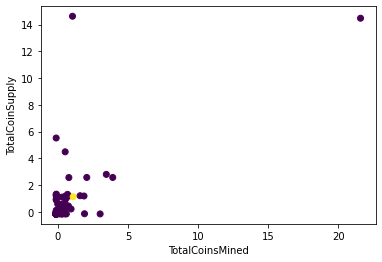

In [60]:
show_clusters(clusters)

###### Recommendation

The elbow curve shows that the cryptocurries can be grouped into two clusters. The plot above does not show the two clusters clearly. Four principal componenets will be required to preserve 90% of the explained variance in dimensionality reduction as specified in the project requirements as shown above.